***

<center> <h1>Historical Voting Record Proportions</h1> </center>

***



* This notebook will take us through using some CDP tools/features to connect to and retrieve data from our databases.
* Included is how to take the objects retrieved from the database and format them for use in analysis(i.e. get them to a pandas dataframe format).
* We will end with a simple example of analysis performed on some voting records data.
* The purpose of this notebook is not to try to explain any patterns or lack thereof in historical vote's, but merely to walk through an example of using CDP's tools and data to perform actual analysis on the data available to any interested party.


***

<center> <h2> Load relevant libraries for the task</h2> </center>

***

In [1]:
## Libraries for connection and retrieval from the database
import fireo  
from google.cloud.firestore import Client
from google.auth.credentials import AnonymousCredentials
from cdp_backend.database import models as db_models


## Libraries for working with the data files
import pandas as pd

## For plotting
from matplotlib import pyplot as plt
import numpy as np

***

<center> <h2>Connect to the data base</h2> </center>

***

In [2]:
## To start off we will connect to Seattle's data base.
seattle = "cdp-seattle-staging-dbengvtn"
fireo.connection(client=Client(
    project=seattle,
    credentials=AnonymousCredentials()
))

***

<center> <h3> Fetch all historical votes from data base</h3> </center>

***

In [3]:
############ Select all of the records from the Vote table ############

## If you want to specify a certain amount of records, just use an argument within fetch() function.
seattle_voting_records = list(db_models.Vote.collection.fetch()) 

## Preview file
seattle_voting_records[0:5]

In [4]:
## Function to calculate total voting records to date:

def total_vote_records(list_of_objects):
    '''
    Takes a list of database objects and prints out the length.
    '''
    total_records = len(list_of_objects)
    print("Total Voting Records To Date:")
    return(total_records)

total_vote_records(seattle_voting_records)

Total Voting Records To Date:


3368

***

* These files actually just contain information about the voting records we are interested in.
* In order to work with the files we need to "unpack" them using this information we retrieved.

***

In [5]:
## Function to unpack voting records with data retrieved

def unpack_vote_objects(db_models_objects):
    '''
    Takes a list of db_models objects and returns a pandas dataframe.
    
    '''
    unpack = list(map(lambda x: {**x.to_dict(), 'id': x.id}, db_models_objects))
    voting_records_df = pd.DataFrame(unpack)
    voting_records_df.set_index('id', inplace=True)
    return(voting_records_df)

## Call unpack function on our list of objects
seattle_voting_records_df = unpack_vote_objects(seattle_voting_records)

In [6]:
## Preview random rows of dataframe
seattle_voting_records_df.sample(12)

,matter_ref,event_ref,event_minutes_item_ref,person_ref,decision,in_majority,external_source_id,key
id,,,,,,,,
ecd0435badb0,<fireo.queries.query_wrapper.ReferenceDocLoade...,<fireo.queries.query_wrapper.ReferenceDocLoade...,<fireo.queries.query_wrapper.ReferenceDocLoade...,<fireo.queries.query_wrapper.ReferenceDocLoade...,Approve,True,70126,vote/ecd0435badb0
46bc06358f7e,<fireo.queries.query_wrapper.ReferenceDocLoade...,<fireo.queries.query_wrapper.ReferenceDocLoade...,<fireo.queries.query_wrapper.ReferenceDocLoade...,<fireo.queries.query_wrapper.ReferenceDocLoade...,Approve,True,70445,vote/46bc06358f7e
16ab0b14ef5b,<fireo.queries.query_wrapper.ReferenceDocLoade...,<fireo.queries.query_wrapper.ReferenceDocLoade...,<fireo.queries.query_wrapper.ReferenceDocLoade...,<fireo.queries.query_wrapper.ReferenceDocLoade...,Approve,True,71106,vote/16ab0b14ef5b
c23a3f3e4e8a,<fireo.queries.query_wrapper.ReferenceDocLoade...,<fireo.queries.query_wrapper.ReferenceDocLoade...,<fireo.queries.query_wrapper.ReferenceDocLoade...,<fireo.queries.query_wrapper.ReferenceDocLoade...,Approve,True,70517,vote/c23a3f3e4e8a
36b89cbd5e1c,<fireo.queries.query_wrapper.ReferenceDocLoade...,<fireo.queries.query_wrapper.ReferenceDocLoade...,<fireo.queries.query_wrapper.ReferenceDocLoade...,<fireo.queries.query_wrapper.ReferenceDocLoade...,Approve,True,69931,vote/36b89cbd5e1c
511eddc5519a,<fireo.queries.query_wrapper.ReferenceDocLoade...,<fireo.queries.query_wrapper.ReferenceDocLoade...,<fireo.queries.query_wrapper.ReferenceDocLoade...,<fireo.queries.query_wrapper.ReferenceDocLoade...,Approve,True,71918,vote/511eddc5519a
bee8cc297016,<fireo.queries.query_wrapper.ReferenceDocLoade...,<fireo.queries.query_wrapper.ReferenceDocLoade...,<fireo.queries.query_wrapper.ReferenceDocLoade...,<fireo.queries.query_wrapper.ReferenceDocLoade...,Approve,True,69497,vote/bee8cc297016
f0cc39eaa67d,<fireo.queries.query_wrapper.ReferenceDocLoade...,<fireo.queries.query_wrapper.ReferenceDocLoade...,<fireo.queries.query_wrapper.ReferenceDocLoade...,<fireo.queries.query_wrapper.ReferenceDocLoade...,Approve,True,69400,vote/f0cc39eaa67d
9a8b55384e4e,<fireo.queries.query_wrapper.ReferenceDocLoade...,<fireo.queries.query_wrapper.ReferenceDocLoade...,<fireo.queries.query_wrapper.ReferenceDocLoade...,<fireo.queries.query_wrapper.ReferenceDocLoade...,Approve,True,70936,vote/9a8b55384e4e


***

* We can see that most of the columns in our dataframe are still in the wrapped location data format from the database.
* For the sake of this notebook we will just be looking at the "decision" and "in_majority" columns.
* First off we will find out what possible values each of these variables can take on.

***

In [7]:
## Get the unique values of decision column
values = list(seattle_voting_records_df.decision.unique())
values

['Approve', 'Absent (Non-Voting)', 'Reject']

***

* It looks like there are only three possible values for the decision column in our data, the possible values are: "Approve", "Reject" or the member is "Absent/Non-Voting".
* Let's tally up the totals for each decision value and see what the proportion is.

***

***

<center> <h2>Proportions of Voting Decisions</h2> </center>

***

In [8]:
## Count up the values for all of the different vote decisions.
totals_df = dict(seattle_voting_records_df['decision'].value_counts())


## Create a DataFrame using these values
count  = list(totals_df.values())
decisions = list(totals_df.keys())
totals_df = pd.DataFrame(data=totals_df, columns=['Decision', "Totals"])
totals_df['Decision'] = decisions
totals_df['Totals'] = count
totals_df

,Decision,Totals
0,Approve,3288
1,Reject,76
2,Absent (Non-Voting),4


***

* Since Absent/Non-Voting is such an insignificant amount we will just focus on the "Accept" and "Reject" values.

***

In [9]:
totals_df = totals_df[(totals_df["Decision"] == 'Approve') 
                      | (totals_df["Decision"] == 'Reject')]
totals_df

,Decision,Totals
0,Approve,3288
1,Reject,76


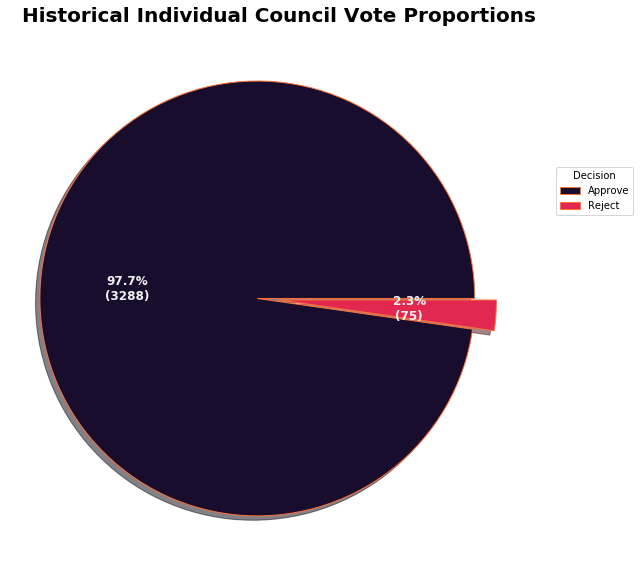

In [10]:
## Plotting proportion of votes

totals_data = totals_df['Totals'][0], totals_df['Totals'][1]

## Explode data
explode = (0.1, 0.0)

## Color parameters
colors = ("#190d2e", "#E22850")

## 3D properties
wp = { 'linewidth' : 1, 'edgecolor' : "#FF7139" }

## Function to Calculate and Display Proportions
def func(pct, allvalues):
    absolute = int(pct / 100.*sum(totals_df['Totals']))
    #return "{:.1f}%\n({:d})".format(pct, absolute)
    return "{:.1f}%\n({:d})".format(pct, absolute)

 
## Creating plot
fig, ax = plt.subplots(figsize =(15, 10))
wedges, texts, autotexts = ax.pie(totals_data,
                                  autopct = lambda pct: func(pct, totals_data),
                                  explode = explode,
                                  #labels = values,
                                  shadow = True,
                                  colors = colors,
                                  startangle = 0,
                                  wedgeprops = wp,
                                  textprops = dict(color ="#F2F2F2"))
 
## Plot Legend
ax.legend(wedges, 
          totals_df['Decision'],
          title ="Decision",
          loc ="center left",

          bbox_to_anchor =(1, 0, .5, 1.4))
 
plt.setp(autotexts, size = 12, weight ="bold")
ax.set_title("Historical Individual Council Vote Proportions",
            size = 20, weight ="bold")
 
## Display Plot
plt.show()


***

* It is important to note that these are the **total individual** votes and **not** the actual **outcomes** for proposed legislative items.
* This seems like an extremely high proportion of Approval votes, and we will leave it to the reader to speculate why this could be.
* For comparison we could pull data from another council's database.
* We can simply replace Seattle's credential's with whatever council we are interested in and repeat the process:

***

In [11]:
## Connect to the database
king_county = "cdp-king-county-b656c71b"
fireo.connection(client=Client(
    project=king_county,
    credentials=AnonymousCredentials()
))

In [12]:
## Fetch all historical voting records
king_county_voting_records = list(db_models.Vote.collection.fetch()) 
total_vote_records(king_county_voting_records)

Total Voting Records To Date:


1851

In [13]:
## Call unpack function on our new list of objects
king_county_voting_records_df = unpack_vote_objects(king_county_voting_records)
king_county_voting_records_df.sample(10)

,matter_ref,event_ref,event_minutes_item_ref,person_ref,decision,in_majority,external_source_id,key
id,,,,,,,,
036cb4b15a1f,<fireo.queries.query_wrapper.ReferenceDocLoade...,<fireo.queries.query_wrapper.ReferenceDocLoade...,<fireo.queries.query_wrapper.ReferenceDocLoade...,<fireo.queries.query_wrapper.ReferenceDocLoade...,Approve,True,163391,vote/036cb4b15a1f
7dbc4edc8347,<fireo.queries.query_wrapper.ReferenceDocLoade...,<fireo.queries.query_wrapper.ReferenceDocLoade...,<fireo.queries.query_wrapper.ReferenceDocLoade...,<fireo.queries.query_wrapper.ReferenceDocLoade...,Approve,True,163153,vote/7dbc4edc8347
a20023750e6f,<fireo.queries.query_wrapper.ReferenceDocLoade...,<fireo.queries.query_wrapper.ReferenceDocLoade...,<fireo.queries.query_wrapper.ReferenceDocLoade...,<fireo.queries.query_wrapper.ReferenceDocLoade...,Approve,True,163877,vote/a20023750e6f
3cc30319d752,<fireo.queries.query_wrapper.ReferenceDocLoade...,<fireo.queries.query_wrapper.ReferenceDocLoade...,<fireo.queries.query_wrapper.ReferenceDocLoade...,<fireo.queries.query_wrapper.ReferenceDocLoade...,Approve,True,164186,vote/3cc30319d752
7802d82df92a,<fireo.queries.query_wrapper.ReferenceDocLoade...,<fireo.queries.query_wrapper.ReferenceDocLoade...,<fireo.queries.query_wrapper.ReferenceDocLoade...,<fireo.queries.query_wrapper.ReferenceDocLoade...,Approve,True,164124,vote/7802d82df92a
ddf6464d52d8,<fireo.queries.query_wrapper.ReferenceDocLoade...,<fireo.queries.query_wrapper.ReferenceDocLoade...,<fireo.queries.query_wrapper.ReferenceDocLoade...,<fireo.queries.query_wrapper.ReferenceDocLoade...,Approve,True,164157,vote/ddf6464d52d8
eeac76b04b5c,<fireo.queries.query_wrapper.ReferenceDocLoade...,<fireo.queries.query_wrapper.ReferenceDocLoade...,<fireo.queries.query_wrapper.ReferenceDocLoade...,<fireo.queries.query_wrapper.ReferenceDocLoade...,Approve,True,164158,vote/eeac76b04b5c
65362716ddac,<fireo.queries.query_wrapper.ReferenceDocLoade...,<fireo.queries.query_wrapper.ReferenceDocLoade...,<fireo.queries.query_wrapper.ReferenceDocLoade...,<fireo.queries.query_wrapper.ReferenceDocLoade...,Approve,True,163182,vote/65362716ddac
438e909af5aa,<fireo.queries.query_wrapper.ReferenceDocLoade...,<fireo.queries.query_wrapper.ReferenceDocLoade...,<fireo.queries.query_wrapper.ReferenceDocLoade...,<fireo.queries.query_wrapper.ReferenceDocLoade...,Approve,True,163723,vote/438e909af5aa


In [14]:
## Count up the values for all of the different vote decisions.
values = list(king_county_voting_records_df.decision.unique())
totals_df = dict(king_county_voting_records_df['decision'].value_counts())


## Create a DataFrame using these values
count  = list(totals_df.values())
decisions = list(totals_df.keys())
totals_df = pd.DataFrame(data=totals_df, columns=['Decision', "Totals"])
totals_df['Decision'] = decisions
totals_df['Totals'] = count
totals_df

,Decision,Totals
0,Approve,1837
1,Reject,14


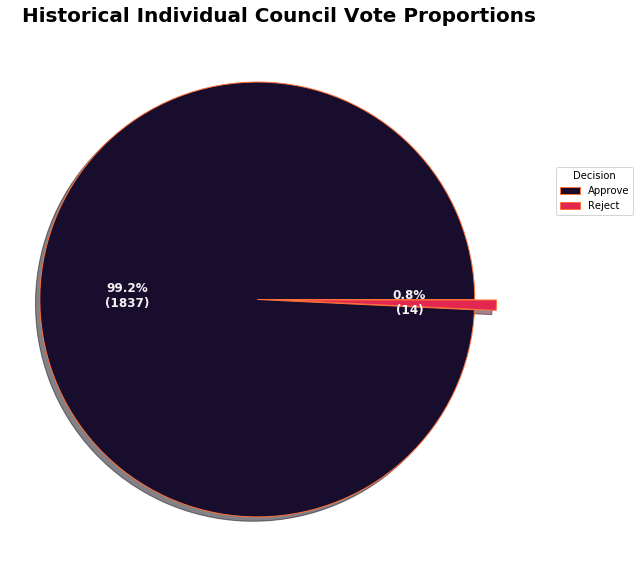

In [15]:
## Plotting proportion of votes

totals_data = totals_df['Totals'][0], totals_df['Totals'][1]

## Explode data
explode = (0.1, 0.0)

## Color parameters
colors = ("#190d2e", "#E22850")

## 3D properties
wp = { 'linewidth' : 1, 'edgecolor' : "#FF7139" }

## Function to Calculate and Display Proportions
def func(pct, allvalues):
    absolute = int(pct / 100.*sum(totals_df['Totals']))
    #return "{:.1f}%\n({:d})".format(pct, absolute)
    return "{:.1f}%\n({:d})".format(pct, absolute)

 
## Creating plot
fig, ax = plt.subplots(figsize =(15, 10))
wedges, texts, autotexts = ax.pie(totals_data,
                                  autopct = lambda pct: func(pct, totals_data),
                                  explode = explode,
                                  #labels = values,
                                  shadow = True,
                                  colors = colors,
                                  startangle = 0,
                                  wedgeprops = wp,
                                  textprops = dict(color ="#F2F2F2"))
 
## Plot Legend
ax.legend(wedges, 
          totals_df['Decision'],
          title ="Decision",
          loc ="center left",

          bbox_to_anchor =(1, 0, .5, 1.4))
 
plt.setp(autotexts, size = 12, weight ="bold")
ax.set_title("Historical Individual Council Vote Proportions",
            size = 20, weight ="bold")
 
## Display Plot
plt.show()


*** 

* Well there you have it, simply swapping out the credentials allows for connection and replication of our analysis across different council's.
* Please feel free to use this notebook and code to do whatever you wish, we can't wait to see what you come up with! 

***